In [133]:
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', 50)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import Normalizer, RobustScaler

In [2]:
data = pd.read_csv('heart_num_0228.csv')
print(len(data))
data.head()

274034


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic","TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap"
0,0,0,4.0,0.0,0.0,3.0,0,6.0,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0,3.0,0,80,1.60,68.04,26.57,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,0,1.0,2.0,0.0,3.0,1,9.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,3.0,1,40,1.57,53.98,21.77,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0
2,0,1,0.0,1.0,0.0,3.0,0,7.0,3.0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,3.0,3.0,0,80,1.80,84.82,26.08,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
3,0,0,3.0,0.0,0.0,3.0,1,7.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,3.0,0,80,1.65,62.60,22.96,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,2.0,0.0,0.0,3.0,0,8.0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0,3.0,1,80,1.63,73.48,27.81,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0


In [3]:
data.isna().sum()

State                                                                          0
Sex                                                                            0
GeneralHealth                                                                  0
PhysicalHealthDays                                                             0
MentalHealthDays                                                               0
LastCheckupTime                                                                0
PhysicalActivities                                                             0
SleepHours                                                                     0
RemovedTeeth                                                                   0
HadHeartAttack                                                                 0
HadAngina                                                                      0
HadStroke                                                                      0
HadAsthma                   

In [4]:
X = data.drop('HadHeartAttack', axis = 1)
y = data['HadHeartAttack']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

<Axes: xlabel='HadHeartAttack', ylabel='count'>

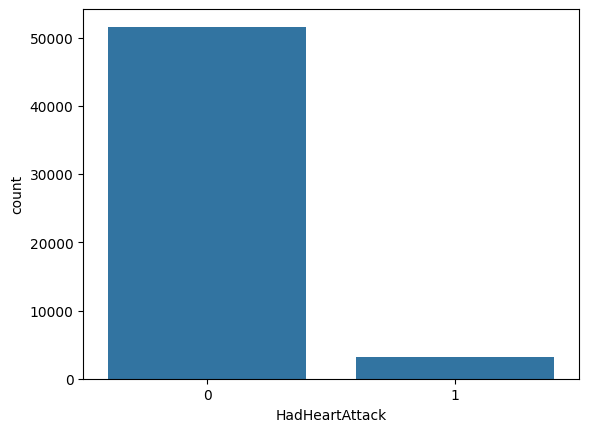

In [6]:
yDF = pd.DataFrame(y_test, columns = ['HadHeartAttack'])
sns.countplot(x = 'HadHeartAttack', data = yDF)

# SGD Classifier

In [7]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state = 1234)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=1234)

In [8]:
sgd_pred = sgd.predict(X_test)
sgd_acc = accuracy_score(y_test, sgd_pred)
print(f'SGD Classifier (Basic) Accuracy: {sgd_acc*100:.2f}%')

SGD Classifier (Basic) Accuracy: 94.26%


In [9]:
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     51607
           1       0.54      0.12      0.20      3200

    accuracy                           0.94     54807
   macro avg       0.74      0.56      0.58     54807
weighted avg       0.92      0.94      0.93     54807



In [10]:
sgd_f1 = f1_score(y_test, sgd_pred)
print(f'SGD Classifier (Basic) F1 score: {sgd_f1:.4f}')

SGD Classifier (Basic) F1 score: 0.1980


## SGD Classifier (IQR)

In [11]:
Q1 = data[['SleepHours', 'BMI']].quantile(q = 0.25)
Q3 = data[['SleepHours', 'BMI']].quantile(q = 0.75)
print(Q1)
print()
print(Q3)

SleepHours     6.00
BMI           24.21
Name: 0.25, dtype: float64

SleepHours     8.00
BMI           31.89
Name: 0.75, dtype: float64


In [12]:
IQR = Q3-Q1

In [13]:
data_iqr = data[(data['SleepHours'] <= Q3['SleepHours']+IQR['SleepHours']*1.5)&(data['SleepHours'] >= Q1['SleepHours']-IQR['SleepHours']*1.5)]
data_iqr = data_iqr[(data_iqr['BMI'] <= Q3['BMI']+IQR['BMI']*1.5)&(data_iqr['BMI'] >= Q1['BMI']-IQR['BMI']*1.5)]
print('Original data:', len(data))
print('Remove Outlier data:', len(data_iqr))

Original data: 274034
Remove Outlier data: 261812


In [14]:
X_iqr = data_iqr.drop('HadHeartAttack', axis = 1)
y_iqr = data_iqr['HadHeartAttack']

In [15]:
X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr = train_test_split(X_iqr, y_iqr, test_size = 0.2, random_state = 1234)

<Axes: xlabel='HadHeartAttack', ylabel='count'>

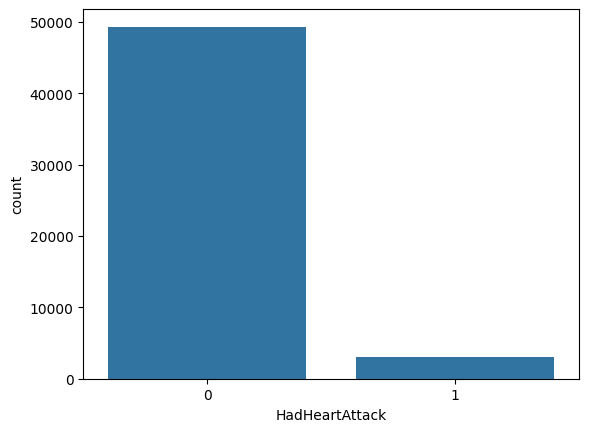

In [16]:
y_test_iqrDF = pd.DataFrame(y_test_iqr, columns = ['HadHeartAttack'])
sns.countplot(x = 'HadHeartAttack', data = y_test_iqrDF)

In [17]:
sgd_iqr = SGDClassifier(random_state = 1234)
sgd_iqr.fit(X_train_iqr, y_train_iqr)

SGDClassifier(random_state=1234)

In [18]:
sgd_pred_iqr = sgd_iqr.predict(X_test_iqr)
sgd_acc_iqr = accuracy_score(y_test_iqr, sgd_pred_iqr)
print(f'SGD Classifier (remove outlier) Accuracy: {sgd_acc_iqr*100:.2f}%')

SGD Classifier (remove outlier) Accuracy: 93.69%


In [19]:
print(classification_report(y_test_iqr, sgd_pred_iqr))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     49351
           1       0.45      0.42      0.43      3012

    accuracy                           0.94     52363
   macro avg       0.71      0.69      0.70     52363
weighted avg       0.93      0.94      0.94     52363



In [20]:
sgd_f1_iqr = f1_score(y_test_iqr, sgd_pred_iqr)
print(f'SGD Classifier (remove outlier) F1 score: {sgd_f1_iqr:.4f}')

SGD Classifier (remove outlier) F1 score: 0.4320


## SGD Classifier (Normal scaling)

In [21]:
norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [22]:
sgd_norm = SGDClassifier(random_state = 1234)
sgd_norm.fit(X_train_norm, y_train)

SGDClassifier(random_state=1234)

In [23]:
sgd_pred_norm = sgd_norm.predict(X_test_norm)
sgd_acc_norm = accuracy_score(y_test, sgd_pred_norm)
print(f'SGDClassifier (Normalizer scaling) Accuracy: {sgd_acc_norm*100:.2f}%')

SGDClassifier (Normalizer scaling) Accuracy: 94.16%


<Axes: xlabel='predict', ylabel='count'>

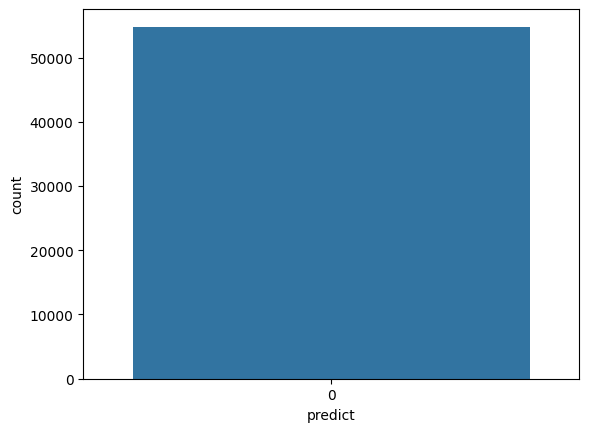

In [24]:
sgd_pred_normDF = pd.DataFrame(sgd_pred_norm, columns = ['predict'])
sns.countplot(x = 'predict', data = sgd_pred_normDF)

In [25]:
print(classification_report(y_test, sgd_pred_norm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     51607
           1       0.00      0.00      0.00      3200

    accuracy                           0.94     54807
   macro avg       0.47      0.50      0.48     54807
weighted avg       0.89      0.94      0.91     54807



c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
sgd_f1_norm = f1_score(y_test, sgd_pred_norm)
print(f'SGD Classifier (Normalizer scaling) F1 score: {sgd_f1_norm:.4f}')

SGD Classifier (Normalizer scaling) F1 score: 0.0000


## SGD Classifier (Robust scaling)

In [27]:
rbs = RobustScaler()
X_train_rbs = rbs.fit_transform(X_train)
X_test_rbs = rbs.transform(X_test)

In [28]:
sgd_rbs = SGDClassifier(random_state = 1234)
sgd_rbs.fit(X_train_rbs, y_train)

SGDClassifier(random_state=1234)

In [29]:
sgd_pred_rbs = sgd_rbs.predict(X_test_rbs)
sgd_acc_rbs = accuracy_score(y_test, sgd_pred_rbs)
print(f'SGD Classifier (Robust scaling) Accuracy: {sgd_acc_rbs*100:.2f}%')

SGD Classifier (Robust scaling) Accuracy: 94.16%


In [30]:
print(classification_report(y_test, sgd_pred_norm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     51607
           1       0.00      0.00      0.00      3200

    accuracy                           0.94     54807
   macro avg       0.47      0.50      0.48     54807
weighted avg       0.89      0.94      0.91     54807



c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
sgd_f1_rbs = f1_score(y_test, sgd_pred_rbs)
print(f'SGD Classifier (Robust scaling) F1 score: {sgd_f1_rbs:.4f}')

SGD Classifier (Robust scaling) F1 score: 0.0000


## SGD Classifier (IQR + Normalizer scaling)

In [32]:
norm = Normalizer()
X_train_iqr_norm = norm.fit_transform(X_train_iqr)
X_test_iqr_norm = norm.transform(X_test_iqr)

In [33]:
sgd_iqr_norm = SGDClassifier(random_state = 1234)
sgd_iqr_norm.fit(X_train_iqr_norm, y_train_iqr)

SGDClassifier(random_state=1234)

In [34]:
sgd_pred_iqr_norm = sgd_iqr_norm.predict(X_test_iqr_norm)
sgd_acc_iqr_norm = accuracy_score(y_test_iqr, sgd_pred_iqr_norm)
print(f'SGD Classifier (remove outlier + Norm scaling) Accuracy: {sgd_acc_iqr_norm*100:.2f}%')

SGD Classifier (remove outlier + Norm scaling) Accuracy: 94.25%


In [35]:
print(classification_report(y_test_iqr, sgd_pred_iqr_norm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     49351
           1       0.00      0.00      0.00      3012

    accuracy                           0.94     52363
   macro avg       0.47      0.50      0.49     52363
weighted avg       0.89      0.94      0.91     52363



c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
sgd_f1_iqr_norm = f1_score(y_test_iqr, sgd_pred_iqr_norm)
print(f'SGD Classifier (remove outlier + Norm scaling) F1 score: {sgd_f1_iqr_norm:.4f}')

SGD Classifier (remove outlier + Norm scaling) F1 score: 0.0000


## SGD Classifier (IQR + Robust scaling)

In [37]:
rbs = RobustScaler()
X_train_iqr_rbs = rbs.fit_transform(X_train_iqr)
X_test_iqr_rbs = rbs.transform(X_test_iqr)

In [38]:
sgd_iqr_rbs = SGDClassifier(random_state = 1234)
sgd_iqr_rbs.fit(X_train_iqr_rbs, y_train_iqr)

SGDClassifier(random_state=1234)

In [39]:
sgd_pred_iqr_rbs = sgd_iqr_rbs.predict(X_test_iqr_rbs)
sgd_acc_iqr_rbs = accuracy_score(y_test_iqr, sgd_pred_iqr_rbs)
print(f'SGD Classifier (remove outlier + Robust scaling) Accuracy: {sgd_acc_iqr_rbs*100:.2f}%')

SGD Classifier (remove outlier + Robust scaling) Accuracy: 94.25%


In [40]:
print(classification_report(y_test_iqr, sgd_pred_iqr_rbs))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     49351
           1       0.00      0.00      0.00      3012

    accuracy                           0.94     52363
   macro avg       0.47      0.50      0.49     52363
weighted avg       0.89      0.94      0.91     52363



c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\god12\Anaconda3\envs\wassup\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
sgd_f1_iqr_rbs = f1_score(y_test_iqr, sgd_pred_iqr_rbs)
print(f'SGD Classifier (remove outlier + Robust scaling) F1 score: {sgd_f1_iqr_rbs:.4f}')

SGD Classifier (remove outlier + Robust scaling) F1 score: 0.0000


## SGD Classifier (SMOTE)

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
smo = SMOTE(random_state = 1234)
X_smo, y_smo = smo.fit_resample(X, y)
print('Original data:', len(X))
print('Resampled data:', len(X_smo))

Original data: 274034
Resampled data: 517190


In [44]:
X_train_smo, X_test_smo, y_train_smo, y_test_smo = train_test_split(X_smo, y_smo, test_size = 0.2, random_state = 1234)

<Axes: xlabel='HadHeartAttack', ylabel='count'>

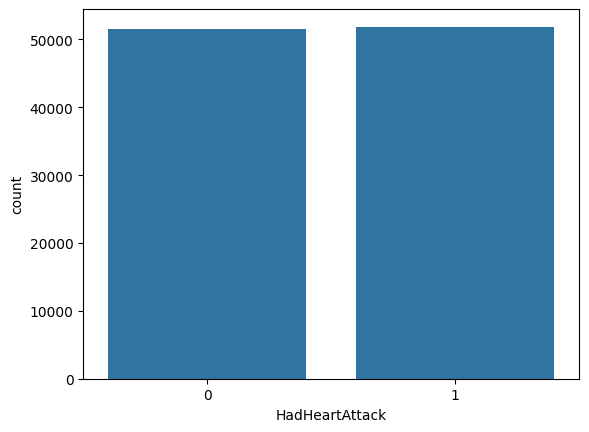

In [45]:
y_test_smoDF = pd.DataFrame(y_test_smo, columns = ['HadHeartAttack'])
sns.countplot(x = 'HadHeartAttack', data = y_test_smoDF)

In [46]:
sgd_smo = SGDClassifier(random_state = 1234)
sgd_smo.fit(X_train_smo, y_train_smo)

SGDClassifier(random_state=1234)

In [47]:
sgd_pred_smo = sgd_smo.predict(X_test_smo)
sgd_acc_smo = accuracy_score(y_test_smo, sgd_pred_smo)
print(f'SGD Classifier (SMOTE) Accuracy: {sgd_acc_smo*100:.2f}%')

SGD Classifier (SMOTE) Accuracy: 89.88%


In [48]:
print(classification_report(y_test_smo, sgd_pred_smo))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     51561
           1       0.93      0.86      0.90     51877

    accuracy                           0.90    103438
   macro avg       0.90      0.90      0.90    103438
weighted avg       0.90      0.90      0.90    103438



In [49]:
sgd_f1_smo = f1_score(y_test_smo, sgd_pred_smo)
print(f'SGD Classifier (SMOTE) F1 score: {sgd_f1_smo:.4f}')

SGD Classifier (SMOTE) F1 score: 0.8954


In [50]:
smo8 = SMOTE(sampling_strategy = 0.8, random_state = 1234)
X_smo8, y_smo8 = smo.fit_resample(X, y)
print('Original data:', len(X))
print('Resampled data:', len(X_smo))
print('Resampled data(strategy = 0.8):', len(X_smo8))

Original data: 274034
Resampled data: 517190
Resampled data(strategy = 0.8): 517190


In [51]:
X_train_smo8, X_test_smo8, y_train_smo8, y_test_smo8 = train_test_split(X_smo8, y_smo8, test_size = 0.2, random_state = 1234)

In [52]:
sgd_smo8 = SGDClassifier(random_state = 1234)
sgd_smo8.fit(X_train_smo8, y_train_smo8)

SGDClassifier(random_state=1234)

In [53]:
sgd_pred_smo8 = sgd_smo8.predict(X_test_smo8)
sgd_acc_smo8 = accuracy_score(y_test_smo8, sgd_pred_smo8)
print(f'SGD Classifier (SMOTE strategy = 0.8) Accuracy: {sgd_acc_smo8*100:.2f}%')

SGD Classifier (SMOTE strategy = 0.8) Accuracy: 89.88%


In [54]:
print(classification_report(y_test_smo8, sgd_pred_smo8))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     51561
           1       0.93      0.86      0.90     51877

    accuracy                           0.90    103438
   macro avg       0.90      0.90      0.90    103438
weighted avg       0.90      0.90      0.90    103438



In [55]:
sgd_f1_smo8 = f1_score(y_test_smo8, sgd_pred_smo8)
print(f'SGD Classifier (SMOTE strategy = 0.8) F1 score: {sgd_f1_smo8:.4f}')

SGD Classifier (SMOTE strategy = 0.8) F1 score: 0.8954


## SGD Classifier (IQR + SMOTE)

In [56]:
smo = SMOTE(random_state = 1234)
X_iqr_smo, y_iqr_smo = smo.fit_resample(X_iqr, y_iqr)
print('Original data:', len(X))
print('IQRed data:', len(X_iqr))
print('Resampled data:', len(X_iqr_smo))

Original data: 274034
IQRed data: 261812
Resampled data: 494774


In [57]:
X_train_iqr_smo, X_test_iqr_smo, y_train_iqr_smo, y_test_iqr_smo = train_test_split(X_iqr_smo, y_iqr_smo, test_size = 0.2, random_state = 1234)

In [58]:
sgd_iqr_smo = SGDClassifier(random_state = 1234)
sgd_iqr_smo.fit(X_train_iqr_smo, y_train_iqr_smo)

SGDClassifier(random_state=1234)

In [59]:
sgd_pred_iqr_smo = sgd_iqr_smo.predict(X_test_iqr_smo)
sgd_acc_iqr_smo = accuracy_score(y_test_iqr_smo, sgd_pred_iqr_smo)
print(f'SGD Classifier (IQR + SMOTE) Accuracy: {sgd_acc_iqr_smo*100:.2f}%')

SGD Classifier (IQR + SMOTE) Accuracy: 90.28%


In [60]:
print(classification_report(y_test_iqr_smo, sgd_pred_iqr_smo))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     49308
           1       0.90      0.91      0.90     49647

    accuracy                           0.90     98955
   macro avg       0.90      0.90      0.90     98955
weighted avg       0.90      0.90      0.90     98955



In [61]:
sgd_f1_iqr_smo = f1_score(y_test_iqr_smo, sgd_pred_iqr_smo)
print(f'SGD Classifier (IQR + SMOTE) F1 score: {sgd_f1_iqr_smo:.4f}')

SGD Classifier (IQR + SMOTE) F1 score: 0.9035


## SGD Classifier (SMOTE + Normal scaling)

In [62]:
norm = Normalizer()
X_train_smo_norm = norm.fit_transform(X_train_smo)
X_test_smo_norm = norm.transform(X_test_smo)

In [63]:
sgd_smo_norm = SGDClassifier(random_state = 1234)
sgd_smo_norm.fit(X_train_smo_norm, y_train_smo)

SGDClassifier(random_state=1234)

In [64]:
sgd_pred_smo_norm = sgd_smo_norm.predict(X_test_smo_norm)
sgd_acc_smo_norm = accuracy_score(y_test_smo, sgd_pred_smo_norm)
print(f'SGD Classifier (SMOTE + Normalizer scaling) Accuracy: {sgd_acc_smo_norm*100:.2f}%')

SGD Classifier (SMOTE + Normalizer scaling) Accuracy: 74.45%


In [65]:
print(classification_report(y_test_smo, sgd_pred_smo_norm))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71     51561
           1       0.70      0.85      0.77     51877

    accuracy                           0.74    103438
   macro avg       0.76      0.74      0.74    103438
weighted avg       0.76      0.74      0.74    103438



In [66]:
sgd_f1_smo_norm = f1_score(y_test_smo, sgd_pred_smo_norm)
print(f'SGD Classifier (SMOTE + Normalizer scaling) F1 score: {sgd_f1_smo_norm:.4f}')

SGD Classifier (SMOTE + Normalizer scaling) F1 score: 0.7690


## SGD Classifier (SMOTE + Robust scaling)

In [67]:
rbs = RobustScaler()
X_train_smo_rbs = rbs.fit_transform(X_train_smo)
X_test_smo_rbs = rbs.transform(X_test_smo)

In [68]:
sgd_smo_rbs = SGDClassifier(random_state = 1234)
sgd_smo_rbs.fit(X_train_smo_rbs, y_train_smo)

SGDClassifier(random_state=1234)

In [69]:
sgd_pred_smo_rbs = sgd_smo_rbs.predict(X_test_smo_rbs)
sgd_acc_smo_rbs = accuracy_score(y_test_smo, sgd_pred_smo_rbs)
print(f'SGD Classifier (SMOTE + Robust scaling) Accuracy: {sgd_acc_smo_rbs*100:.2f}%')

SGD Classifier (SMOTE + Robust scaling) Accuracy: 91.01%


In [70]:
print(classification_report(y_test_smo, sgd_pred_smo_rbs))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     51561
           1       0.96      0.86      0.91     51877

    accuracy                           0.91    103438
   macro avg       0.91      0.91      0.91    103438
weighted avg       0.91      0.91      0.91    103438



In [71]:
sgd_f1_smo_rbs = f1_score(y_test_smo, sgd_pred_smo_rbs)
print(f'SGD Classifier (SMOTE + robust scaling) F1 score: {sgd_f1_smo_rbs:.4f}')

SGD Classifier (SMOTE + robust scaling) F1 score: 0.9057


## SGD Classifier (IQR + SMOTE + Norm scaling)

In [72]:
norm = Normalizer()
X_train_iqr_smo_norm = norm.fit_transform(X_train_iqr_smo)
X_test_iqr_smo_norm = norm.transform(X_test_iqr_smo)

In [73]:
sgd_iqr_smo_norm = SGDClassifier(random_state = 1234)
sgd_iqr_smo_norm.fit(X_train_iqr_smo_norm, y_train_iqr_smo)

SGDClassifier(random_state=1234)

In [74]:
sgd_pred_iqr_smo_norm = sgd_iqr_smo_norm.predict(X_test_iqr_smo_norm)
sgd_acc_iqr_smo_norm = accuracy_score(y_test_iqr_smo, sgd_pred_iqr_smo_norm)
print(f'SGD Classifier (IQR + SMOTE + Norm scaling) Accuracy: {sgd_acc_iqr_smo_norm*100:.2f}%')

SGD Classifier (IQR + SMOTE + Norm scaling) Accuracy: 74.52%


In [75]:
print(classification_report(y_test_iqr_smo, sgd_pred_iqr_smo_norm))

              precision    recall  f1-score   support

           0       0.82      0.63      0.71     49308
           1       0.70      0.86      0.77     49647

    accuracy                           0.75     98955
   macro avg       0.76      0.74      0.74     98955
weighted avg       0.76      0.75      0.74     98955



In [76]:
sgd_f1_iqr_smo_norm = f1_score(y_test_iqr_smo, sgd_pred_iqr_smo_norm)
print(f'SGD Classifier (IQR + SMOTE + Norm scaling) F1 score: {sgd_f1_iqr_smo_norm:.4f}')

SGD Classifier (IQR + SMOTE + Norm scaling) F1 score: 0.7720


## SGD Classifier (IQR + SMOTE + Robust scaling)

In [77]:
rbs = RobustScaler()
X_train_iqr_smo_rbs = rbs.fit_transform(X_train_iqr_smo)
X_test_iqr_smo_rbs = rbs.transform(X_test_iqr_smo)

In [78]:
sgd_iqr_smo_rbs = SGDClassifier(random_state = 1234)
sgd_iqr_smo_rbs.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

SGDClassifier(random_state=1234)

In [79]:
sgd_pred_iqr_smo_rbs = sgd_iqr_smo_rbs.predict(X_test_iqr_smo_rbs)
sgd_acc_iqr_smo_rbs = accuracy_score(y_test_iqr_smo, sgd_pred_iqr_smo_rbs)
print(f'SGD Classifier (IQR + SMOTE + Robust scaling) Accuracy: {sgd_acc_iqr_smo_rbs*100:.2f}')

SGD Classifier (IQR + SMOTE + Robust scaling) Accuracy: 91.66


In [80]:
print(classification_report(y_test_iqr_smo, sgd_pred_iqr_smo_rbs))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     49308
           1       0.95      0.88      0.91     49647

    accuracy                           0.92     98955
   macro avg       0.92      0.92      0.92     98955
weighted avg       0.92      0.92      0.92     98955



In [81]:
sgd_f1_iqr_smo_rbs = f1_score(y_test_iqr_smo, sgd_pred_iqr_smo_rbs)
print(f'SGD Classifier (IQR + SMOTE + Robust scaling) F1 score: {sgd_f1_iqr_smo_rbs:.4f}')

SGD Classifier (IQR + SMOTE + Robust scaling) F1 score: 0.9139


# AdaBoost Classifier

In [82]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state = 1234)
clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=1234)

In [83]:
clf_pred = clf.predict(X_test)
clf_acc = accuracy_score(y_test, clf_pred)
print(f'AdaBoost (Basic) Accuracy: {clf_acc*100:.2f}%')

AdaBoost (Basic) Accuracy: 94.48%


In [84]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     51607
           1       0.56      0.26      0.36      3200

    accuracy                           0.94     54807
   macro avg       0.76      0.63      0.67     54807
weighted avg       0.93      0.94      0.94     54807



In [85]:
clf_f1 = f1_score(y_test, clf_pred)
print(f'AdaBoost (Basic) F1 score {clf_f1:.4f}')

AdaBoost (Basic) F1 score 0.3591


## AdaBoost (IQR)

In [86]:
ada_iqr = AdaBoostClassifier(random_state = 1234)
ada_iqr.fit(X_train_iqr, y_train_iqr)

AdaBoostClassifier(random_state=1234)

In [87]:
ada_pred_iqr = ada_iqr.predict(X_test_iqr)
ada_acc_iqr = accuracy_score(y_test_iqr, ada_pred_iqr)
print(f'AdaBoost (IQR) Accuracy: {ada_acc_iqr*100:.2f}')

AdaBoost (IQR) Accuracy: 94.52


In [88]:
print(classification_report(y_test_iqr, ada_pred_iqr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     49351
           1       0.55      0.26      0.35      3012

    accuracy                           0.95     52363
   macro avg       0.75      0.62      0.66     52363
weighted avg       0.93      0.95      0.94     52363



In [89]:
ada_f1_iqr = f1_score(y_test_iqr, ada_pred_iqr)
print(f'AdaBoost (IQR) F1 score: {ada_f1_iqr:.4f}')

AdaBoost (IQR) F1 score: 0.3524


## AdaBoost (Norm scaling)

In [90]:
ada_norm = AdaBoostClassifier(random_state = 1234)
ada_norm.fit(X_train_norm, y_train)

AdaBoostClassifier(random_state=1234)

In [91]:
ada_pred_norm = ada_norm.predict(X_test_norm)
ada_acc_norm = accuracy_score(y_test, ada_pred_norm)
print(f'AdaBoost (Normalizer scaling) Accuracy: {ada_acc_norm*100:.2f}%')

AdaBoost (Normalizer scaling) Accuracy: 94.45%


In [92]:
print(classification_report(y_test, ada_pred_norm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     51607
           1       0.55      0.27      0.36      3200

    accuracy                           0.94     54807
   macro avg       0.75      0.63      0.67     54807
weighted avg       0.93      0.94      0.94     54807



In [93]:
ada_f1_norm = f1_score(y_test, ada_pred_norm)
print(f'AdaBoost (Normalizer scaling) F1 score: {ada_f1_norm:.4f}')

AdaBoost (Normalizer scaling) F1 score: 0.3642


## AdaBoost (Robust scaling)

In [94]:
ada_rbs = AdaBoostClassifier(random_state = 1234)
ada_rbs.fit(X_train_rbs, y_train)

AdaBoostClassifier(random_state=1234)

In [95]:
ada_pred_rbs = ada_rbs.predict(X_test_rbs)
ada_acc_rbs = accuracy_score(y_test, ada_pred_rbs)
print(f'AdaBoost (Robust scaling) Accuracy: {ada_acc_rbs*100:.2f}%')

AdaBoost (Robust scaling) Accuracy: 94.48%


In [96]:
print(classification_report(y_test, ada_pred_rbs))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     51607
           1       0.56      0.26      0.36      3200

    accuracy                           0.94     54807
   macro avg       0.76      0.63      0.67     54807
weighted avg       0.93      0.94      0.94     54807



In [97]:
ada_f1_rbs = f1_score(y_test, ada_pred_rbs)
print(f'AdaBoost (Robust scaling) F1 score: {ada_f1_rbs:.4f}')

AdaBoost (Robust scaling) F1 score: 0.3591


## AdaBoost (IQR + Normalizer scaling)

In [98]:
ada_iqr_norm = AdaBoostClassifier(random_state = 1234)
ada_iqr_norm.fit(X_train_iqr_norm, y_train_iqr)

AdaBoostClassifier(random_state=1234)

In [99]:
ada_pred_iqr_norm = ada_iqr_norm.predict(X_test_iqr_norm)
ada_acc_iqr_norm = accuracy_score(y_test_iqr, ada_pred_iqr_norm)
print(f'AdaBoost (IQR + Normalizer scaling) Accuracy: {ada_acc_iqr_norm*100:.2f}%')

AdaBoost (IQR + Normalizer scaling) Accuracy: 94.57%


In [100]:
print(classification_report(y_test_iqr, ada_pred_iqr_norm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     49351
           1       0.56      0.28      0.37      3012

    accuracy                           0.95     52363
   macro avg       0.76      0.63      0.67     52363
weighted avg       0.93      0.95      0.94     52363



In [101]:
ada_f1_iqr_norm = f1_score(y_test_iqr, ada_pred_iqr_norm)
print(f'AdaBoost (IQR + Norm scaling) F1 score: {ada_f1_iqr_norm:.4f}')

AdaBoost (IQR + Norm scaling) F1 score: 0.3690


## AdaBoost (IQR + Robust scaling)

In [102]:
ada_iqr_rbs = AdaBoostClassifier(random_state = 1234)
ada_iqr_rbs.fit(X_train_iqr_rbs, y_train_iqr)

AdaBoostClassifier(random_state=1234)

In [103]:
ada_pred_iqr_rbs = ada_iqr_rbs.predict(X_test_iqr_rbs)
ada_acc_iqr_rbs = accuracy_score(y_test_iqr, sgd_pred_iqr_rbs)
print(f'AdaBoost (IQR + Robust scaling) Accuracy: {ada_acc_iqr_rbs*100:.2f}%')

AdaBoost (IQR + Robust scaling) Accuracy: 94.25%


In [104]:
print(classification_report(y_test_iqr, ada_pred_iqr_rbs))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     49351
           1       0.55      0.26      0.35      3012

    accuracy                           0.95     52363
   macro avg       0.75      0.62      0.66     52363
weighted avg       0.93      0.95      0.94     52363



In [105]:
ada_f1_iqr_rbs = f1_score(y_test_iqr, ada_pred_iqr_rbs)
print(f'AdaBoost (IQR + Robust scaling) F1 score: {ada_f1_iqr_rbs:.4f}')

AdaBoost (IQR + Robust scaling) F1 score: 0.3524


## AdaBoost (SMOTE)

In [106]:
ada_smo = AdaBoostClassifier(random_state = 1234)
ada_smo.fit(X_train_smo, y_train_smo)

AdaBoostClassifier(random_state=1234)

In [107]:
ada_pred_smo = ada_smo.predict(X_test_smo)
ada_acc_smo = accuracy_score(y_test_smo, ada_pred_smo)
print(f'AdaBoost (SMOTE) Accuracy: {ada_acc_smo*100:.2f}%')

AdaBoost (SMOTE) Accuracy: 94.63%


In [108]:
print(classification_report(y_test_smo, ada_pred_smo))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     51561
           1       0.96      0.93      0.95     51877

    accuracy                           0.95    103438
   macro avg       0.95      0.95      0.95    103438
weighted avg       0.95      0.95      0.95    103438



In [109]:
ada_f1_smo = f1_score(y_test_smo, ada_pred_smo)
print(f'AdaBoost (SMOTE) F1 score: {ada_f1_smo:.4f}')

AdaBoost (SMOTE) F1 score: 0.9456


## AdaBoost (IQR + SMOTE)

In [110]:
ada_iqr_smo = AdaBoostClassifier(random_state = 1234)
ada_iqr_smo.fit(X_train_iqr_smo, y_train_iqr_smo)

AdaBoostClassifier(random_state=1234)

In [111]:
ada_pred_iqr_smo = ada_iqr_smo.predict(X_test_iqr_smo)
ada_acc_iqr_smo = accuracy_score(y_test_iqr_smo, ada_pred_iqr_smo)
print(f'AdaBoost (IQR + SMOTE) Accuracy: {ada_acc_iqr_smo*100:.2f}%')

AdaBoost (IQR + SMOTE) Accuracy: 94.85%


In [112]:
print(classification_report(y_test_iqr_smo, ada_pred_iqr_smo))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     49308
           1       0.96      0.94      0.95     49647

    accuracy                           0.95     98955
   macro avg       0.95      0.95      0.95     98955
weighted avg       0.95      0.95      0.95     98955



In [113]:
ada_f1_iqr_smo = f1_score(y_test_iqr_smo, ada_pred_iqr_smo)
print(f'AdaBoost (IQR + SMOTE) F1 score: {ada_f1_iqr_smo:.4f}')

AdaBoost (IQR + SMOTE) F1 score: 0.9480


## AdaBoost (SMOTE + Normal scaling)

In [114]:
ada_smo_norm = AdaBoostClassifier(random_state = 1234)
ada_smo_norm.fit(X_train_smo_norm, y_train_smo)

AdaBoostClassifier(random_state=1234)

In [115]:
ada_pred_smo_norm = ada_smo_norm.predict(X_test_smo_norm)
ada_acc_smo_norm = accuracy_score(y_test_smo, ada_pred_smo_norm)
print(f'AdaBoost (SMOTE + Noramlizer scaling) Accuracy: {ada_acc_smo_norm*100:.2f}%')

AdaBoost (SMOTE + Noramlizer scaling) Accuracy: 90.91%


In [116]:
print(classification_report(y_test_smo, ada_pred_smo_norm))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     51561
           1       0.93      0.89      0.91     51877

    accuracy                           0.91    103438
   macro avg       0.91      0.91      0.91    103438
weighted avg       0.91      0.91      0.91    103438



In [117]:
ada_f1_smo_norm = f1_score(y_test_smo, ada_pred_smo_norm)
print(f'AdaBoost (SMOTE + Normalizer scaling) F1 score: {ada_f1_smo_norm:.4f}')

AdaBoost (SMOTE + Normalizer scaling) F1 score: 0.9077


## AdaBoost (SMOTE + Robust scaling)

In [118]:
ada_smo_rbs = AdaBoostClassifier(random_state = 1234)
ada_smo_rbs.fit(X_train_smo_rbs, y_train_smo)

AdaBoostClassifier(random_state=1234)

In [119]:
ada_pred_smo_rbs = ada_smo_rbs.predict(X_test_smo_rbs)
ada_acc_smo_rbs = accuracy_score(y_test_smo, ada_pred_smo_rbs)
print(f'AdaBoost (SMOTE + Robust scaling) Accuracy: {ada_acc_smo_rbs*100:.2f}%')

AdaBoost (SMOTE + Robust scaling) Accuracy: 94.63%


In [120]:
print(classification_report(y_test_smo, ada_pred_smo_rbs))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     51561
           1       0.96      0.93      0.95     51877

    accuracy                           0.95    103438
   macro avg       0.95      0.95      0.95    103438
weighted avg       0.95      0.95      0.95    103438



In [121]:
ada_f1_smo_rbs = f1_score(y_test_smo, ada_pred_smo_rbs)
print(f'AdaBoost (SMOTE + Robust scaling) F1 score: {ada_f1_smo_rbs:.4f}')

AdaBoost (SMOTE + Robust scaling) F1 score: 0.9456


## AdaBoost (IQR + SMOTE + Normalizer scaling)

In [122]:
ada_iqr_smo_norm = AdaBoostClassifier(random_state = 1234)
ada_iqr_smo_norm.fit(X_train_iqr_smo_norm, y_train_iqr_smo)

AdaBoostClassifier(random_state=1234)

In [123]:
ada_pred_iqr_smo_norm = ada_iqr_smo_norm.predict(X_test_iqr_smo_norm)
ada_acc_iqr_smo_norm = accuracy_score(y_test_iqr_smo, ada_pred_iqr_smo_norm)
print(f'AdaBoost (IQR + SMOTE + Norm scaling) Accuracy: {ada_acc_iqr_smo_norm*100:.2f}%')

AdaBoost (IQR + SMOTE + Norm scaling) Accuracy: 91.17%


In [124]:
print(classification_report(y_test_iqr_smo, ada_pred_iqr_smo_norm))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     49308
           1       0.92      0.90      0.91     49647

    accuracy                           0.91     98955
   macro avg       0.91      0.91      0.91     98955
weighted avg       0.91      0.91      0.91     98955



In [125]:
ada_f1_iqr_smo_norm = f1_score(y_test_iqr_smo, ada_pred_iqr_smo_norm)
print(f'AdaBoost (IQR + SMOTE + Norm scaling) F1 score: {ada_f1_iqr_smo_norm:.4f}')

AdaBoost (IQR + SMOTE + Norm scaling) F1 score: 0.9108


## AdaBoost (IQR + SMOTE + Robust scaling)

In [126]:
ada_iqr_smo_rbs = AdaBoostClassifier(random_state = 1234)
ada_iqr_smo_rbs.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

AdaBoostClassifier(random_state=1234)

In [127]:
ada_pred_iqr_smo_rbs = ada_iqr_smo_rbs.predict(X_test_iqr_smo_rbs)
ada_acc_iqr_smo_rbs = accuracy_score(y_test_iqr_smo, ada_pred_iqr_smo_rbs)
print(f'AdaBoost (IQR + SMOTE + Robust scaling) Accuracy: {ada_acc_iqr_smo_rbs*100:.2f}%')

AdaBoost (IQR + SMOTE + Robust scaling) Accuracy: 94.85%


In [128]:
print(classification_report(y_test_iqr_smo, ada_pred_iqr_smo_rbs))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     49308
           1       0.96      0.94      0.95     49647

    accuracy                           0.95     98955
   macro avg       0.95      0.95      0.95     98955
weighted avg       0.95      0.95      0.95     98955



In [129]:
ada_f1_iqr_smo_rbs = f1_score(y_test_iqr_smo, ada_pred_iqr_smo_rbs)
print(f'AdaBoost (IQR + SMOTE + Robust scaling) F1 score: {ada_f1_iqr_smo_rbs:.4f}')

AdaBoost (IQR + SMOTE + Robust scaling) F1 score: 0.9480


## SGD Classifier (Robust + IQR + SMOTE)

In [131]:
from sklearn.model_selection import GridSearchCV

In [135]:
sgd_gs = SGDClassifier()
sgd_params = {
    'loss':['hinge', 'log_loss'],
    'max_iter':[1000, 5000, 10000],
    'alpha':np.logspace(-4, 4, 10)
}
sgd_gs = GridSearchCV(sgd_gs, sgd_params, cv = 5)
sgd_gs.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'loss': ['hinge', 'log_loss'],
                         'max_iter': [1000, 5000, 10000]})

In [136]:
sgd_gs.best_params_

{'alpha': 0.0001, 'loss': 'log_loss', 'max_iter': 1000}

In [137]:
sgd1 = SGDClassifier(alpha = 0.0001, loss = 'log_loss', max_iter = 1000, random_state = 1234)
sgd1.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

SGDClassifier(loss='log_loss', random_state=1234)

In [138]:
sgd1_pred = sgd1.predict(X_test_iqr_smo_rbs)
sgd1_acc = accuracy_score(y_test_iqr_smo, sgd1_pred)
print(f'SGD Classifier (IQR+ + SMOTE + Robust scaling) Accuracy: {sgd1_acc*100:.2f}%')

SGD Classifier (IQR+ + SMOTE + Robust scaling) Accuracy: 91.63%


In [148]:
print(classification_report(y_test_iqr_smo, sgd1_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     49308
           1       0.93      0.90      0.91     49647

    accuracy                           0.92     98955
   macro avg       0.92      0.92      0.92     98955
weighted avg       0.92      0.92      0.92     98955



In [149]:
sgd1_f1 = f1_score(y_test_iqr_smo, sgd1_pred)
print(f'SGD Classifier (IQR + SMOTE + Robust) F1 score: {sgd1_f1:.4f}')

SGD Classifier (IQR + SMOTE + Robust) F1 score: 0.9149


In [140]:
sgd2 = SGDClassifier(alpha = 0.001, random_state = 1234)
sgd2.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

SGDClassifier(alpha=0.001, random_state=1234)

In [141]:
sgd2_pred = sgd2.predict(X_test_iqr_smo_rbs)
sgd2_acc = accuracy_score(y_test_iqr_smo, sgd2_pred)
print(f'SGD Classifier (IQR + SMOTE + Robust) Accuracy: {sgd2_acc*100:.2f}%')

SGD Classifier (IQR + SMOTE + Robust) Accuracy: 91.37%


In [142]:
sgd3 = SGDClassifier(max_iter = 10000, random_state = 1234)
sgd3.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

SGDClassifier(max_iter=10000, random_state=1234)

In [143]:
sgd3_pred = sgd3.predict(X_test_iqr_smo_rbs)
sgd3_acc = accuracy_score(y_test_iqr_smo, sgd3_pred)
print(f'SGD Classifier (IQR + SMOTE + Robust) Accuracy: {sgd3_acc*100:.2f}%')

SGD Classifier (IQR + SMOTE + Robust) Accuracy: 91.66%


In [194]:
print(classification_report(y_test_iqr_smo, sgd3_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     49308
           1       0.95      0.88      0.91     49647

    accuracy                           0.92     98955
   macro avg       0.92      0.92      0.92     98955
weighted avg       0.92      0.92      0.92     98955



In [195]:
sgd3_f1 = f1_score(y_test_iqr_smo, sgd3_pred)
print(f'SGD Classifier (IQR + SMOTE + Robust) F1 score: {sgd3_f1:.4f}')

SGD Classifier (IQR + SMOTE + Robust) F1 score: 0.9139


In [144]:
sgd4 = SGDClassifier(max_iter = 10000, alpha = 0.001, random_state = 1234)
sgd4.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

SGDClassifier(alpha=0.001, max_iter=10000, random_state=1234)

In [145]:
sgd4_pred = sgd4.predict(X_test_iqr_smo_rbs)
sgd4_acc = accuracy_score(y_test_iqr_smo, sgd4_pred)
print(f'SGD Classifier (IQR + SMOTE + Robust) Accuracy: {sgd4_acc*100:.2f}%')

SGD Classifier (IQR + SMOTE + Robust) Accuracy: 91.37%


In [146]:
sgd5 = SGDClassifier(max_iter = 10000, loss = 'log_loss', random_state = 1234)
sgd5.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

SGDClassifier(loss='log_loss', max_iter=10000, random_state=1234)

In [147]:
sgd5_pred = sgd5.predict(X_test_iqr_smo_rbs)
sgd5_acc = accuracy_score(y_test_iqr_smo, sgd5_pred)
print(f'SGD Classifier (IQR + SMOTE + Robust) Accuracy: {sgd5_acc*100:.2f}%')

SGD Classifier (IQR + SMOTE + Robust) Accuracy: 91.63%


In [152]:
sgd_gs2 = SGDClassifier()
sgd_params2 = {
    'loss':['log_loss'],
    'penalty':['elasticnet'],
    'max_iter':[1000, 5000, 10000],
    'alpha':np.logspace(-4, 4, 10),
    'l1_ratio':[0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.13,0.14,0.15,0.2]
}
sgd_gs2 = GridSearchCV(sgd_gs2, sgd_params2, cv = 6, verbose = 1)
sgd_gs2.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

Fitting 6 folds for each of 330 candidates, totalling 1980 fits


GridSearchCV(cv=6, estimator=SGDClassifier(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'l1_ratio': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12,
                                      0.13, 0.14, 0.15, 0.2],
                         'loss': ['log_loss'], 'max_iter': [1000, 5000, 10000],
                         'penalty': ['elasticnet']},
             verbose=1)

In [153]:
sgd_gs2.best_params_

{'alpha': 0.0001,
 'l1_ratio': 0.12,
 'loss': 'log_loss',
 'max_iter': 5000,
 'penalty': 'elasticnet'}

In [154]:
sgd6 = SGDClassifier(alpha = 0.0001, l1_ratio = 0.12, loss = 'log_loss', max_iter = 5000, penalty = 'elasticnet')
sgd6.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

SGDClassifier(l1_ratio=0.12, loss='log_loss', max_iter=5000,
              penalty='elasticnet')

In [155]:
sgd6_pred = sgd6.predict(X_test_iqr_smo_rbs)
sgd6_acc = accuracy_score(y_test_iqr_smo, sgd6_pred)
print(f'SGD Classifier (IQR + SMOTE + Robust) Accuracy: {sgd6_acc*100:.2f}%')

SGD Classifier (IQR + SMOTE + Robust) Accuracy: 91.61%


In [156]:
sgd6_f1 = f1_score(y_test_iqr_smo, sgd6_pred)
print(f'SGD Classifier (IQR + SMOTE + Robust) F1 score: {sgd6_f1:.4f}')

SGD Classifier (IQR + SMOTE + Robust) F1 score: 0.9147


## AdaBoost Classifier (IQR + SMOTE + Robust scaling)

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ada_iqr_smo_rbs = AdaBoostClassifier(random_state = 1234)
ada_iqr_smo_rbs.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)
ada_pred_iqr_smo_rbs = ada_iqr_smo_rbs.predict(X_test_iqr_smo_rbs)
ada_acc_iqr_smo_rbs = accuracy_score(y_test_iqr_smo, ada_pred_iqr_smo_rbs)
print(f'AdaBoost (IQR + SMOTE + Robust scaling) Accuracy: {ada_acc_iqr_smo_rbs*100:.2f}%')
print(classification_report(y_test_iqr_smo, ada_pred_iqr_smo_rbs))
ada_f1_iqr_smo_rbs = f1_score(y_test_iqr_smo, ada_pred_iqr_smo_rbs)
print(f'AdaBoost (IQR + SMOTE + Robust scaling) F1 score: {ada_f1_iqr_smo_rbs:.4f}')

In [160]:
base_model = DecisionTreeClassifier(max_depth = 5)
ada1 = AdaBoostClassifier(estimator = base_model)
ada1.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5))

In [161]:
ada1_pred = ada1.predict(X_test_iqr_smo_rbs)
ada1_acc = accuracy_score(y_test_iqr_smo, ada1_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) Accuracy: {ada1_acc*100:.2f}%')

AdaBoost (IQR + SMOTE + Robust) Accuracy: 96.94%


In [162]:
print(classification_report(y_test_iqr_smo, ada1_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     49308
           1       0.98      0.96      0.97     49647

    accuracy                           0.97     98955
   macro avg       0.97      0.97      0.97     98955
weighted avg       0.97      0.97      0.97     98955



In [163]:
ada1_f1 = f1_score(y_test_iqr_smo, ada1_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) F1 score: {ada1_f1:.4f}')

AdaBoost (IQR + SMOTE + Robust) F1 score: 0.9691


In [164]:
base_model2 = DecisionTreeClassifier(max_depth = 10)
ada2 = AdaBoostClassifier(estimator = base_model2)
ada2.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10))

In [165]:
ada2_pred = ada2.predict(X_test_iqr_smo_rbs)
ada2_acc = accuracy_score(y_test_iqr_smo, ada2_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) Accuracy: {ada2_acc*100:.2f}%')

AdaBoost (IQR + SMOTE + Robust) Accuracy: 96.44%


In [166]:
print(classification_report(y_test_iqr_smo, ada2_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     49308
           1       0.97      0.96      0.96     49647

    accuracy                           0.96     98955
   macro avg       0.96      0.96      0.96     98955
weighted avg       0.96      0.96      0.96     98955



In [167]:
ada2_f1 = f1_score(y_test_iqr_smo, ada2_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) F1 score: {ada2_f1:.4f}')

AdaBoost (IQR + SMOTE + Robust) F1 score: 0.9643


In [168]:
base_model3 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10)
ada3 = AdaBoostClassifier(estimator = base_model3)
ada3.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    min_samples_leaf=10))

In [169]:
ada3_pred = ada3.predict(X_test_iqr_smo_rbs)
ada3_acc = accuracy_score(y_test_iqr_smo, ada3_pred)
print(f'AadBoost (IQR + SMOTE + Robust) Accuracy: {ada3_acc*100:.2f}%')

AadBoost (IQR + SMOTE + Robust) Accuracy: 96.97%


In [170]:
print(classification_report(y_test_iqr_smo, ada3_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     49308
           1       0.98      0.96      0.97     49647

    accuracy                           0.97     98955
   macro avg       0.97      0.97      0.97     98955
weighted avg       0.97      0.97      0.97     98955



In [171]:
ada3_f1 = f1_score(y_test_iqr_smo, ada3_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) F1 score: {ada3_f1:.4f}')

AdaBoost (IQR + SMOTE + Robust) F1 score: 0.9694


In [ ]:
'n_estimators':[10, 50, 100, 500]
'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]

In [173]:
ada4 = AdaBoostClassifier(estimator = base_model3, n_estimators = 10, learning_rate = 0.001)
ada4.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    min_samples_leaf=10),
                   learning_rate=0.001, n_estimators=10)

In [174]:
ada4_pred = ada4.predict(X_test_iqr_smo_rbs)
ada4_acc = accuracy_score(y_test_iqr_smo, ada4_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) Accuracy: {ada4_acc*100:.2f}%')

AdaBoost (IQR + SMOTE + Robust) Accuracy: 85.74%


In [175]:
ada5 = AdaBoostClassifier(estimator = base_model3, n_estimators = 50, learning_rate = 0.001)
ada5.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    min_samples_leaf=10),
                   learning_rate=0.001)

In [176]:
ada5_pred = ada5.predict(X_test_iqr_smo_rbs)
ada5_acc = accuracy_score(y_test_iqr_smo, ada5_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) Accuracy: {ada5_acc*100:.2f}%')

AdaBoost (IQR + SMOTE + Robust) Accuracy: 88.35%


In [177]:
print(classification_report(y_test_iqr_smo, ada5_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     49308
           1       0.86      0.91      0.89     49647

    accuracy                           0.88     98955
   macro avg       0.88      0.88      0.88     98955
weighted avg       0.88      0.88      0.88     98955



In [178]:
ada5_f1 = f1_score(y_test_iqr_smo, ada5_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) F1 score: {ada5_f1:.4f}')

AdaBoost (IQR + SMOTE + Robust) F1 score: 0.8873


In [182]:
ada6 = AdaBoostClassifier(estimator = base_model3, n_estimators = 100, learning_rate = 0.001)
ada6.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    min_samples_leaf=10),
                   learning_rate=0.001, n_estimators=100)

In [183]:
ada6_pred = ada6.predict(X_test_iqr_smo_rbs)
ada6_acc = accuracy_score(y_test_iqr_smo, ada6_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) Accuracy: {ada6_acc*100:.2f}%')

AdaBoost (IQR + SMOTE + Robust) Accuracy: 91.61%


In [184]:
print(classification_report(y_test_iqr_smo, ada6_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     49308
           1       0.91      0.93      0.92     49647

    accuracy                           0.92     98955
   macro avg       0.92      0.92      0.92     98955
weighted avg       0.92      0.92      0.92     98955



In [185]:
ada6_f1 = f1_score(y_test_iqr_smo, ada6_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) F1 score: {ada6_f1:.4f}')

AdaBoost (IQR + SMOTE + Robust) F1 score: 0.9172


In [186]:
ada7 = AdaBoostClassifier(estimator = base_model3, n_estimators = 100, learning_rate = 0.0001)
ada7.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    min_samples_leaf=10),
                   learning_rate=0.0001, n_estimators=100)

In [187]:
ada7_pred = ada7.predict(X_test_iqr_smo_rbs)
ada7_acc = accuracy_score(y_test_iqr_smo, ada7_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) Accuracy: {ada7_acc*100:.2f}%')

AdaBoost (IQR + SMOTE + Robust) Accuracy: 85.74%


In [188]:
print(classification_report(y_test_iqr_smo, ada7_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     49308
           1       0.88      0.83      0.85     49647

    accuracy                           0.86     98955
   macro avg       0.86      0.86      0.86     98955
weighted avg       0.86      0.86      0.86     98955



In [189]:
ada7_f1 = f1_score(y_test_iqr_smo, ada7_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) F1 score: {ada7_f1:.4f}')

AdaBoost (IQR + SMOTE + Robust) F1 score: 0.8536


In [190]:
ada8 = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.001)
ada8.fit(X_train_iqr_smo_rbs, y_train_iqr_smo)

AdaBoostClassifier(learning_rate=0.001, n_estimators=100)

In [191]:
ada8_pred = ada8.predict(X_test_iqr_smo_rbs)
ada8_acc = accuracy_score(y_test_iqr_smo, ada8_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) Accuracy: {ada8_acc*100:.2f}%')

AdaBoost (IQR + SMOTE + Robust) Accuracy: 76.22%


In [192]:
print(classification_report(y_test_iqr_smo, ada8_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     49308
           1       0.76      0.77      0.77     49647

    accuracy                           0.76     98955
   macro avg       0.76      0.76      0.76     98955
weighted avg       0.76      0.76      0.76     98955



In [193]:
ada8_f1 = f1_score(y_test_iqr_smo, ada8_pred)
print(f'AdaBoost (IQR + SMOTE + Robust) F1 score: {ada8_f1:.4f}')

AdaBoost (IQR + SMOTE + Robust) F1 score: 0.7656


In [196]:
from sklearn.metrics import confusion_matrix
sgd_cm = confusion_matrix(y_test_iqr_smo, sgd_pred_iqr_smo_rbs)
sgd_cm

array([[46946,  2362],
       [ 5888, 43759]], dtype=int64)

In [197]:
ada_cm = confusion_matrix(y_test_iqr_smo, ada3_pred)
ada_cm

array([[48490,   818],
       [ 2182, 47465]], dtype=int64)

In [198]:
import matplotlib.pyplot as plt
import seaborn
plt.figure(figsize = (5, 5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

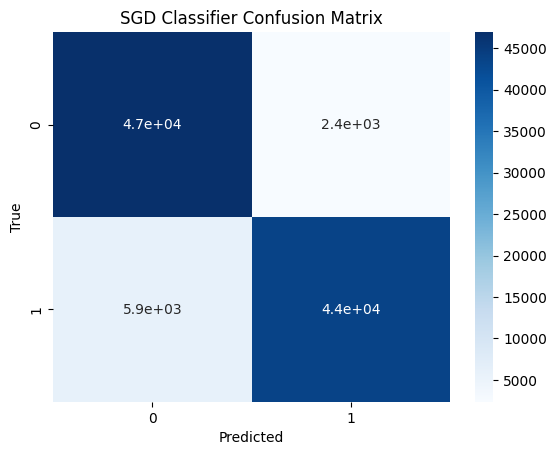

In [199]:
sns.heatmap(sgd_cm, annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SGD Classifier Confusion Matrix')
plt.show()

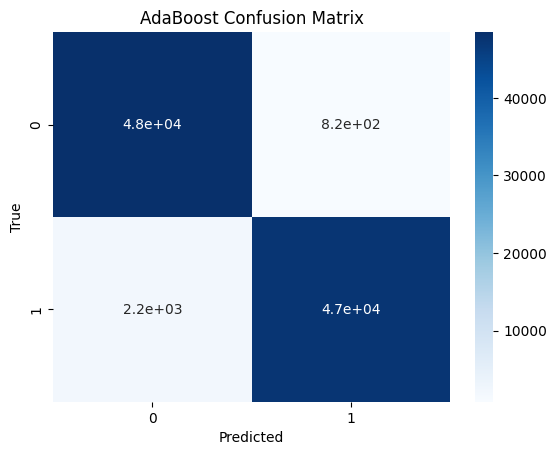

In [200]:
sns.heatmap(ada_cm, annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('AdaBoost Confusion Matrix')
plt.show()